# Statistical Power - Lab

## Introduction


In this lesson, you'll practice doing a power-analysis during experimental design. As you've seen, power analysis allows you to determine the sample size required to detect an effect of a given size with a given degree of confidence. In other words, it allows you to determine the probability of detecting an effect of a given size with a given level of confidence, under sample size constraints.

The following four factors have an intimate relationship:

* Sample size
* Effect size
* Significance level = P (Type I error) = probability of finding an effect that is not there
* **Power = 1 - P (Type II error)** = probability of finding an effect that is there

Given any three of these, we can easily determine the fourth.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## Let's get started!
  
To start, let's import the necessary libraries required for this simuation:.

In [34]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Scenario

A researcher wants to study how daily protein supplementation in the elderly population will affect baseline liver fat. The study budget will allow enrollment of 24 patients. Half will be randomized to a placebo group and half to the protein supplement treatment group and the trial will be carried out over one month. It is desired to see whether the mean change in percentage of liver fat from baseline to the end of the study differs between the two groups in the study. 

With this, the researcher writes the null hypothesis 

**There is no difference between experimental and control means i.e. H0 is equal to H1**

And the alternative Hypothesis

**There is a difference between experimental and control means i.e. H0 is not equal to H1**

The researcher needs to know what power  will be obtained under the sample size restrictions to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis. 

To determine the practicality of this experimental design, you'll a power analysis simulation.

In [2]:
# Number of patients in each group
sample_size = 12

# Control group
control_mean = 0
control_sd = 0.21

# Experimental group
experimental_mean = 0.17
experimental_sd = 0.21

#Set the number of simulations for our test = 1000
n_sim = 1000

You can now start running our simulations to run an independance t-test with above data and store the calculated p_value in our `p` array. Perform following tasks.

* Initialize a numpy array and fill it with Nan values for storing the results (p_value) of the independance T-test.
* For defined number of simulations (i.e. 1000), do the following:

    * Generate a random normal variable with control mean and sd
    * Generate a random normal variable with experimental mean and sd
    * Run and independant t-test using control and experimental data
    * Store the p value for each test

* Calculate the total number and overall proportion of simulations and where Null hypothesis is rejected


In [3]:
# For reproducability 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim

for s in range(n_sim):

    control = np.random.normal(loc= control_mean, scale=control_sd, size=sample_size)
    
    experimental = np.random.normal(loc= experimental_mean, scale=experimental_sd, size=sample_size)
    
    t_test = stats.ttest_ind(control, experimental)
    
    p[s] = t_test[1]

# number of null hypothesis rejections
num_null_rejects = np.sum(p < 0.05)
power = num_null_rejects/float(n_sim)

power

0.495

These results indicate that using 12 participants in each group and with given statistics, the statistical power of the experimetn is 49%. This can be interpreted as follows:

> **If a large effect (.17 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of the time. **

## Sample size requirements for a given effect size

Often in behavioral research .8 is accepted as a sufficient level of power.  

Clearly, this is not the case for the experiment as currently designed. Determine the required sample size in order to identify a difference of .17 or greater between the group means with an 80% power.

In [4]:
from statsmodels.stats.power import TTestPower

In [5]:
power = TTestPower()

In [6]:
power.solve_power(effect_size=.17, alpha=0.05, power=.8)

273.51381725963785

In [7]:
target = 0.8

We will also need to define the number of simulations and a `current` variable for an iterative comparison with target power defined. We shall start with a sample size of 12 (current) and keep increasing it until the required power is achieved. We shall also increase the number of simulations to 10,000 for a more deterministic output. 

In [8]:
# minimum sample size to start the simulations 
sample_size = 12
null_rejected = 0
n_sim = 10000

As above, perform the following

* Initialize an empty array for storing results
* initiliaze a list for storing samplesize x power summary
* While current power is less than target power
    * Generate distributions for control and experimental groups using given statistics (as before)
    * Run a t-test and store results
    * Calculate current power 
    * Output current sample size and power calculated for inspection
    * Store results: Sample size , power
    * increase the sample size by 1 and repeat

In [9]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

# keep iterating until desired power is obtained

power_sample = []
while null_rejected < target:

    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)
    
    # For control group 
    data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
    
    # For experimental group
    data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            
    
    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
                                
    p_vals = result[1]

    #Since you know that all simulations are from a different distribution \
    #all those that rejected the null-hypothesis are valid
    null_rejected = np.sum(p_vals < 0.05) / n_sim

    print("Number of Samples:", sample_size,", Calculated Power =", null_rejected)
    power_sample.append([sample_size, null_rejected])

    # increase the number of samples by one for the next iteration of the loop
    sample_size += 1
    
    

Number of Samples: 12 , Calculated Power = 0.4754
Number of Samples: 13 , Calculated Power = 0.5066
Number of Samples: 14 , Calculated Power = 0.5423
Number of Samples: 15 , Calculated Power = 0.5767
Number of Samples: 16 , Calculated Power = 0.6038
Number of Samples: 17 , Calculated Power = 0.6297
Number of Samples: 18 , Calculated Power = 0.658
Number of Samples: 19 , Calculated Power = 0.6783
Number of Samples: 20 , Calculated Power = 0.7056
Number of Samples: 21 , Calculated Power = 0.7266
Number of Samples: 22 , Calculated Power = 0.7481
Number of Samples: 23 , Calculated Power = 0.7624
Number of Samples: 24 , Calculated Power = 0.7864
Number of Samples: 25 , Calculated Power = 0.8031


You can also plot the calculated power against sample size to visually inspect the effect of increasing sample size. 

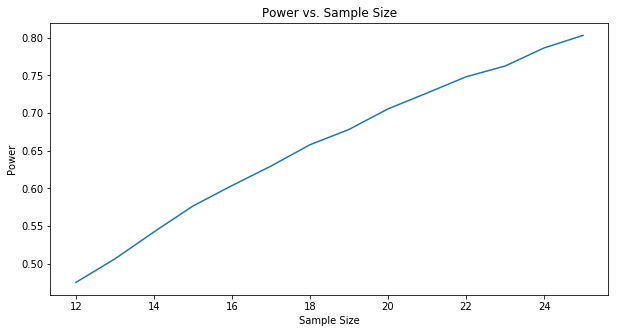

In [10]:
# Plot a sample size X Power line graph 

plt.figure(figsize=(10,5))
plt.title('Power vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')

ans = power_sample
df = pandas.DataFrame(ans, index=None)
plt.plot(df[0], df[1])

plt.show()

This output indicates that in order to get the required power (80%) to detect a difference of 0.17, you would need considerably higher number of patients. 

>**BONUS EXERCISE: Calculating power across varying sample and effect sizes**

>In the previous examples, we have assumed a fixed effect size. However, perhaps we want to investigate how power changes with both effect size and sample size. This is again a straightforward extension of the previous example. 

>1. Generate samples with sizes ranging from 10 to 50 per group
2. Set effect size from less than small (i.e. 0.1) to slightly bigger than large (0.8)
3. set number of simulations to 10000
4. Use nested For loop i.e. for all chosen effect sizes,for all chosen sample sizes, for all groups (i.e. 2) - run the 2 sample independant test and store power, chosen sample size and effect size
5. Visualize your data in a meaningful way to communicate results 

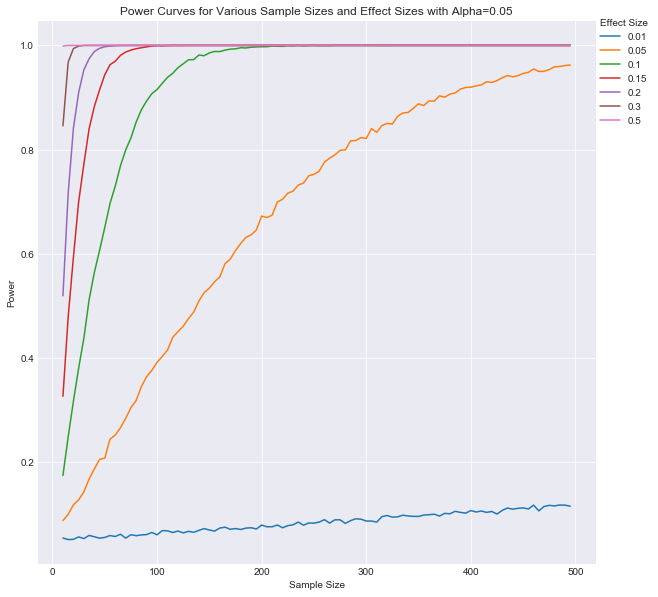

In [52]:
def power_curve(min_sample_size = 10, max_sample_size=500, n_sim = 10000, control_mean = 0,
                control_sd = 0.21, experimental_mean = 0.17, experimental_sd = 0.21):
    p = (np.empty(n_sim))
    p.fill(np.nan)

    # keep iterating until desired power is obtained

    power_sample = []
    for sample_size in range(min_sample_size, max_sample_size, 5):

        data = np.empty([n_sim, sample_size, 2])
        data.fill(np.nan)

        # For control group 
        data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])

        # For experimental group
        data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            

        result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)

        p_vals = result[1]

        #Since you know that all simulations are from a different distribution \
        #all those that rejected the null-hypothesis are valid
        null_rejected = np.sum(p_vals < 0.05) / n_sim

        power_sample.append(null_rejected)

    return power_sample
cols = {}

for exp_mean in [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]:
    col = power_curve(experimental_mean=exp_mean)
    cols[exp_mean] = col
df = pd.DataFrame.from_dict(cols)
df.index = list(range(10,500,5))
df.plot(figsize=(10,10))
plt.legend(title='Effect Size',loc=(1,0.8))
plt.title('Power Curves for Various Sample Sizes and Effect Sizes with Alpha=0.05')
plt.xlabel('Sample Size')
plt.ylabel('Power');

## Summary

In this lesson, you gained further practice with "statistical power" and how it can be used to analyze experimental design. You ran a simulation to determine the sample size that would provide a given value of power (for a given alpha and effect size). Running simulations like this as well as further investigations regarding required sample sizes for higher power thresholds or smaller effect sizes is critical in designing meaningful experiments where one can be confident in the subsequent conclusions drawn.